In [ ]:
### DMRG (excited states)
### symmetry
include("Potts-Operators & Hamiltonian.jl")
Q = 5
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
using JLD2
function run_sim(D,alg,lambda,Q )
    ψ = FiniteMPS(L,Vp,Vect[ZNIrrep{Q}](0=>D,1=>D,2=>D,3=>D,4=>D))
      
    ψ2 = FiniteMPS(L,Vp,Vect[ZNIrrep{Q}](0=>D,1=>D,2=>D,3=>D,4=>D))
    H = Potts_Hamiltonian(L;lambda = lambda)
    println("here")
    if alg != "ED"
    (ψ, envir , delta)   = find_groundstate(ψ, H, DMRG(maxiter = 500,tol=1e-5, eigalg =MPSKit.Defaults.alg_eigsolve(; ishermitian=false)))
    end
    #(ψ, envir , delta)   = find_groundstate(ψ, H, VUMPS(maxiter = 500,tol=1e-6))
    if alg == "QuasiparticleAnsatz"
            En0, st0 = excitations(H, QuasiparticleAnsatz(ishermitian=false), ψ, envir; sector=ZNIrrep{5}(0),num=1)
            expe = expectation_value(ψ,H)
            st = vcat(expe,En0)
            save_object("QuasiparticleAnsatz D$D,L = $L,$lambda.jld2", st)
    elseif alg == "ChepigaAnsatz"
            Ground_energy = expectation_value(ψ,H)
            En, st = excitations(H, ChepigaAnsatz(), ψ, envir;num=1)
            En0 = En[1]-Ground_energy
            st = vcat(Ground_energy ,En0)
            save_object("chepiga D$D,L = $L,$lambda.jld2", st)
        elseif alg == "DMRG" 
            Ground_energy = expectation_value(ψ,H)
            En ,st2  = excitations(H,FiniteExcited(gsalg = DMRG(tol=1e-5,eigalg =MPSKit.Defaults.alg_eigsolve(maxiter = 500,ishermitian=false))), (ψ,),init = ψ2,num=1)
            En0 = En[1]-Ground_energy
            st = vcat(Ground_energy ,En0)
            save_object("DMRG D$D,L = $L $lambda.jld2", st)
        elseif alg == "ED"
            println("here")
            save_object("ED,L = $L $lambda.jld2", exact_diagonalization(H,sector=ZNIrrep{5}(0),num= 2,alg =MPSKit.Arnoldi())[1])
        else
            pritnln("$alg not supported")
    end
end

run_sim (generic function with 1 method)

In [ ]:
L = 10
Q = 5
for term in 0.56:0.5:3.06
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
run_sim(5,"ED",0.0788+term*1im,5)

In [ ]:
L = 10
Q = 5
for term in 0.56:0.5:3.06
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
run_sim(80,"QuasiparticleAnsatz",0.0788+term*1im,5)
end

here


┌ Info: DMRG init:	obj = -3.803640266798e+01 +2.712683116369e+00im	err = 2.3561e-01
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:35
┌ Info: DMRG   1:	obj = -3.764183288097e+01 +3.362789577601e+01im	err = 2.2721844162e-02	time = 1.01 min
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   2:	obj = -3.764195678903e+01 +3.362781774164e+01im	err = 3.5384671038e-04	time = 22.35 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   3:	obj = -3.764192957894e+01 +3.362780669793e+01im	err = 1.5745327751e-04	time = 40.42 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   4:	obj = -3.764190576809e+01 +3.362779430446e+01im	err = 1.1371379675e-04	time = 46.25 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   5:	obj = -3.7

In [ ]:
L = 10
Q = 5
for term in 0.56:0.5:3.06
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
run_sim(80,"DMRG",0.0788+term*1im,5)
end

In [12]:

D = 10:5:40
L = 10
lambda = 0.0788
Q = 5
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
for d in D
    run_sim(d,"QuasiparticleAnsatz",lambda,5)
end

┌ Info: DMRG init:	obj = -3.795315739194e+01	err = 9.0498e-02
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:35
┌ Info: DMRG   1:	obj = -4.253718934409e+01	err = 1.6645585528e-02	time = 1.48 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   2:	obj = -4.253793657021e+01	err = 1.1118193258e-03	time = 0.74 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   3:	obj = -4.253796962779e+01	err = 3.3988710044e-04	time = 0.69 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   4:	obj = -4.253797859762e+01	err = 1.3901423373e-04	time = 0.79 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src\algorithms\groundstate\dmrg.jl:57
┌ Info: DMRG   5:	obj = -4.253798927311e+01	err = 1.5167467162e-04	time = 0.88 sec
└ @ MPSKit C:\Users\vicva\.julia\packages\MPSKit\EfZBD\src

In [ ]:

D = 10:5:40
L = 10
lambda = 0.0788 + 5im
Q = 5
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
for d in D
    run_sim(d,"ChepigaAnsatz",lambda,5)
end

In [ ]:
L = 10
lambda = 0.0788 + 5im
Q = 5
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
for d in D
    run_sim(d,"QuasiparticleAnsatz",lambda,5)
end

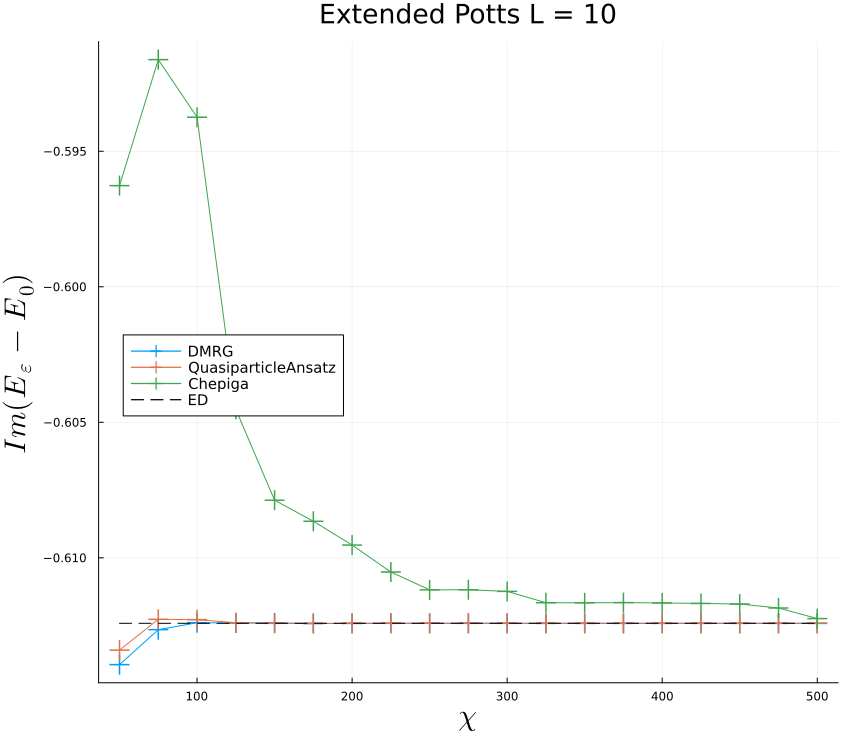

ComplexF64[-42.27096819233929 + 2.7948089577960147im, -41.51890483328391 + 2.182393467234047im]



"c:\\Users\\vicva\\OneDrive\\Documenten\\git\\Thesis_CCFT\\Section3.1\\Fig6.png"

In [13]:
using JLD2,Plots,LaTeXStrings

D = 10:5:100
L = 10
Ee = []
Eb = []
Ec = []
Ea = []
lambda = 0.0788 + 0.0603im
# for d in D
#     E = load_object("Epsilon/DMRG_PBC_D"*"$d"*"_L=24_0.079 + 0.06im.jld2")
#     push!(Ec,E[2])
    
# end
# for d in D
#     E = load_object("Epsilon/QPA_PBC_D"*"$d"*"_L=24_0.079 + 0.06im.jld2")
#     push!(Eb,E[2])
    
for d in D
    E = load_object("DMRG D$d,L = $L $lambda.jld2")
    push!(Ec,E[2])
    
end
for d in D
    E = load_object("QuasiparticleAnsatz D$d,L = $L,$lambda.jld2")
    push!(Eb,E[2])
end
    
# end
Ed = []
lambda = 0.0788 + 0.0603im
for d in D
    E = load_object("schepiga D$d,L = 10,0.0788 + 0.0603im.jld2")
    push!(Ed,E[2])
    
end
# for d in D
#     E = load_object("QuasiparticleAnsatz D$d,L = $L,$lambda.jld2")
#     push!(Ea,E[2]-E[1])
    
# end
# Eg = []
# Ef = []
# lambda = 0.0788 + 5im
# for d in D
#     E = load_object("DMRG D$d,L = $L $lambda.jld2")
#     push!(Ef,E[2]-E[1])
    
# end
# D = 10:5:15
# for d in D
#     E = load_object("QuasiparticleAnsatz D$d,L = $L,$lambda.jld2")
#     push!(Eg,E[2]-E[1])
    
# end
# D = 10:5:40
# lambda = 0.079 + 0.060im
e = load_object("ED,L = 10 0.0788 + 0.0603im.jld2")
println(e)
p = plot(5*D,imag(Ec),xguidefontsize=20,yguidefontsize=20,xlabel=L"\chi",ylabel=L"Im(E_{ε}-E_0)",legendfontsize=10,size = (850,750),marker=:cross,label = "DMRG",title = "Extended Potts L = 10", markersize = 10)
plot!(5*D,imag(Eb),xguidefontsize=20,yguidefontsize=20,xlabel=L"\chi",marker=:cross,label = "QuasiparticleAnsatz",titlefontsize= 18,legend = :left, markersize = 10)
# p.o[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plot!(5*D,imag(Ed),xguidefontsize=20,yguidefontsize=20,xlabel=L"\chi",marker=:cross,label = "Chepiga",titlefontsize= 18, markersize = 10)
plot!(5*D,fill( imag(e[2] - e[1]),length(D)),label = "ED",linestyle=:dash,color="black")
# p = plot(5*D,real(Ec),xlabel="",size = (400,400),marker=:cross,label = "")
# plot!(5*D,real(Eb),xlabel="",ylabel="",marker=:cross,label = "")
#plot!(5*D,real(Ed),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "DMRG λ = 0.0788 + 0.603i")
#plot!(5*D,real(Ea),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "QuasiparticleAnsatz λ = 0.0788 + 0.603i")
# plot!(p,5*D,real(Ef),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "DMRG λ = 0.0788 + 5i")
# D = 10:5:15yy
println()
#plot!(p,5*D,real(Eg),xlabel=L"\chi",ylabel=L"Re(E_{ε}-E_0)",marker=:cross,label = "QuasiparticleAnsatz λ = 0.0788 + 5i")
display(p)
savefig(p,"Fig6")

In [9]:
p = plot(5*D,imag(Ee),xlabel=L"\chi",ylabel=L"Im(E_{ε}-E_0)",marker=:cross,label = "Quasiparticle")
plot!(p,5*D,imag(Eb),xlabel=L"\chi",ylabel=L"Im(E_{ε}-E_0)",marker=:cross,label = "Chepiga")
plot!(p,5*D,imag(Ec),xlabel=L"\chi",ylabel=L"Im(E_{ε}-E_0)",marker=:cross,label = "DMRG",title = "Large Non-Hermitian System")
savefig(p,"Fig4")

"c:\\Users\\vicva\\OneDrive\\Documenten\\git\\Thesis_CCFT\\Fig4.png"